In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'nfile' is the DataFrame from the combined .txt files
# Example data structure
# nfile = pd.read_csv("combined_output.csv")

# Define intervals for 'Peak Field on Sample [mT]'
intervals = [
    {"center": 20, "tolerance": 3},
    {"center": 30, "tolerance": 3},
    {"center": 40, "tolerance": 5},
    {"center": 50, "tolerance": 5}
]

results = []

# Calculate mean and standard deviation for each interval
for interval in intervals:
    lower_bound = interval["center"] - interval["tolerance"]
    upper_bound = interval["center"] + interval["tolerance"]
    
    # Filter data within the interval
    filtered_data = nfile[
        (nfile["Peak Field on Sample [mT]"] >= lower_bound) & 
        (nfile["Peak Field on Sample [mT]"] <= upper_bound)
    ]
    
    # Calculate mean and standard deviation
    mean_resistance = filtered_data["Surface Resistance [nOhm]"].mean()
    std_resistance = filtered_data["Surface Resistance [nOhm]"].std()
    
    # Append results
    results.append({
        "Interval": f"{interval['center']}±{interval['tolerance']}",
        "Mean Resistance (nOhm)": mean_resistance,
        "Std Resistance (nOhm)": std_resistance
    })

# Create a new DataFrame for results
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv("resistance_analysis.csv", index=False)

# Print the results
print(results_df)

# Plot the results
plt.errorbar(
    results_df["Interval"],
    results_df["Mean Resistance (nOhm)"],
    yerr=results_df["Std Resistance (nOhm)"],
    fmt='o',
    capsize=5,
    label="Surface Resistance"
)

plt.title("Surface Resistance Analysis")
plt.xlabel("Peak Field Interval [mT]")
plt.ylabel("Surface Resistance [nOhm]")
plt.grid(True)
plt.legend()
plt.savefig("resistance_analysis_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [1]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funclib.importf import *

script_dir = os.path.dirname(os.path.abspath("main.ipynb"))
phd_dir = os.path.dirname(script_dir)
TestPath = os.path.join(phd_dir, "QPR Data", "2022-04-04 - test #36 - ARIES B-3.19 Siegen SIS")

Test1 = HandleTest(TestPath)
Test1Data = Test1.LoadData(pattern="*41*MHz*.txt")

#pd.set_option('display.max_rows', 100)
print(Test1.Data.info())

#Test1Data.plot.scatter(x="Peak Field on Sample [mT]", y="Surface Resistance [nOhm]")
#plt.show()


File d:\PhD\QPR Data\2022-04-04 - test #36 - ARIES B-3.19 Siegen SIS\2022-04-04 411MHz test run 2.00K.txt contains No Data and will be skipped.
File d:\PhD\QPR Data\2022-04-04 - test #36 - ARIES B-3.19 Siegen SIS\2022-04-08 411MHz B_max 1.00K.txt contains No Data and will be skipped.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3555 entries, 0 to 3554
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date_Time                  3555 non-null   datetime64[ns]
 1   Set Temp [K]               3555 non-null   float64       
 2   Set Freq [Hz]              3555 non-null   float64       
 3   Duty Cycle [%]             3555 non-null   float64       
 4   Pulse Period [ms]          3555 non-null   float64       
 5   P_forw (giga)              0 non-null      float64       
 6   P_refl (giga)              0 non-null      float64       
 7   P_trans (giga)             0 non-nul

File d:\PhD\QPR Data\2022-04-04 - test #36 - ARIES B-3.19 Siegen SIS\2022-04-04 411MHz test run 2.00K.txt contains No Data and will be skipped.
File d:\PhD\QPR Data\2022-04-04 - test #36 - ARIES B-3.19 Siegen SIS\2022-04-08 411MHz B_max 1.00K.txt contains No Data and will be skipped.
2.5
218     2.5010
219     2.4992
220     2.4993
221     2.5007
222     2.4994
         ...  
3480    2.4984
3481    2.4992
3482    2.5018
3483    2.5009
3484    2.4993
Name: LS336 B [K], Length: 244, dtype: float64


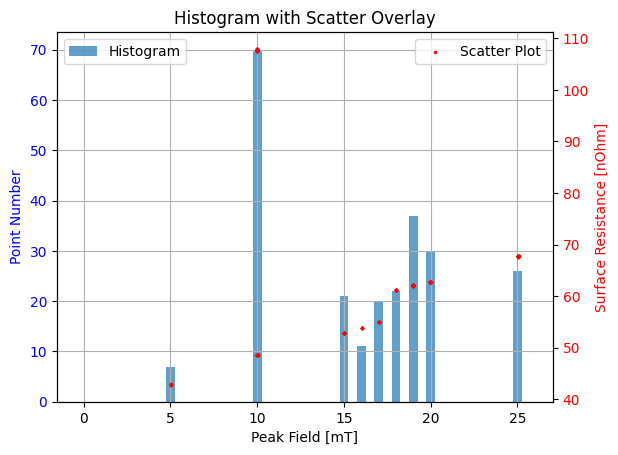

In [1]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funclib.importf import *

script_dir = os.path.dirname(os.path.abspath("main.ipynb"))
phd_dir = os.path.dirname(script_dir)
TestPath = os.path.join(phd_dir, "QPR Data", "2022-04-04 - test #36 - ARIES B-3.19 Siegen SIS")

Test1 = HandleTest(TestPath)
Test1Data = Test1.LoadData(pattern="*41*MHz*.txt")

#Test1Data.info()
#pd.set_option('display.max_rows', None)
#print(Test1Data["File Name"])
#print(Test1.Data["Run"].unique())

Test1.plotHistogram(step = 0.5, ParamName=FieldNames.SENS_B, ParamVal=2.5, ParamTol=0.05)


In [3]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', None)


display=PrintFilteredData(Test1.FilteredData,10,1,FieldNames.PEAK_FIELD,FieldNames.RS,FieldNames.PEAK_FIELD,"Run","File Name")

      Surface Resistance [nOhm]  Peak Field on Sample [mT] Run                                                             File Name
225                   48.508180                  10.015732   1                   2022-04-04 411MHz Rs(B)_Measurements_Run1 2.50K.txt
226                   48.508180                  10.015732   1                   2022-04-04 411MHz Rs(B)_Measurements_Run1 2.50K.txt
227                   48.519208                  10.017040   1                   2022-04-04 411MHz Rs(B)_Measurements_Run1 2.50K.txt
228                   48.519208                  10.017040   1                   2022-04-04 411MHz Rs(B)_Measurements_Run1 2.50K.txt
229                   48.519208                  10.017040   1                   2022-04-04 411MHz Rs(B)_Measurements_Run1 2.50K.txt
230                   48.519208                  10.017040   1                   2022-04-04 411MHz Rs(B)_Measurements_Run1 2.50K.txt
231                   48.519208                  10.017040   1       

In [ ]:
help(PrintFilteredData)